In [1]:
import pandas as pd # membaca csv_file dan mengelola data dalam DataFrame
import numpy as np # operasi array dan numerik
import matplotlib # operasi visualisasi plot
import matplotlib.pyplot as plt # membuat plot dan grafik
import seaborn as sns # visualisasi data 
import statsmodels.api as sm # analisis statistik 

from numpy import mean # menghitung mean dalam list
from tensorflow import keras # library deep learning
from keras.models import Sequential # jenis model dalam Keras
from keras.layers import Dense # jenis layer dalam Keras
from sklearn import metrics # evaluasi model
from sklearn.metrics import confusion_matrix, classification_report # evaluasi model



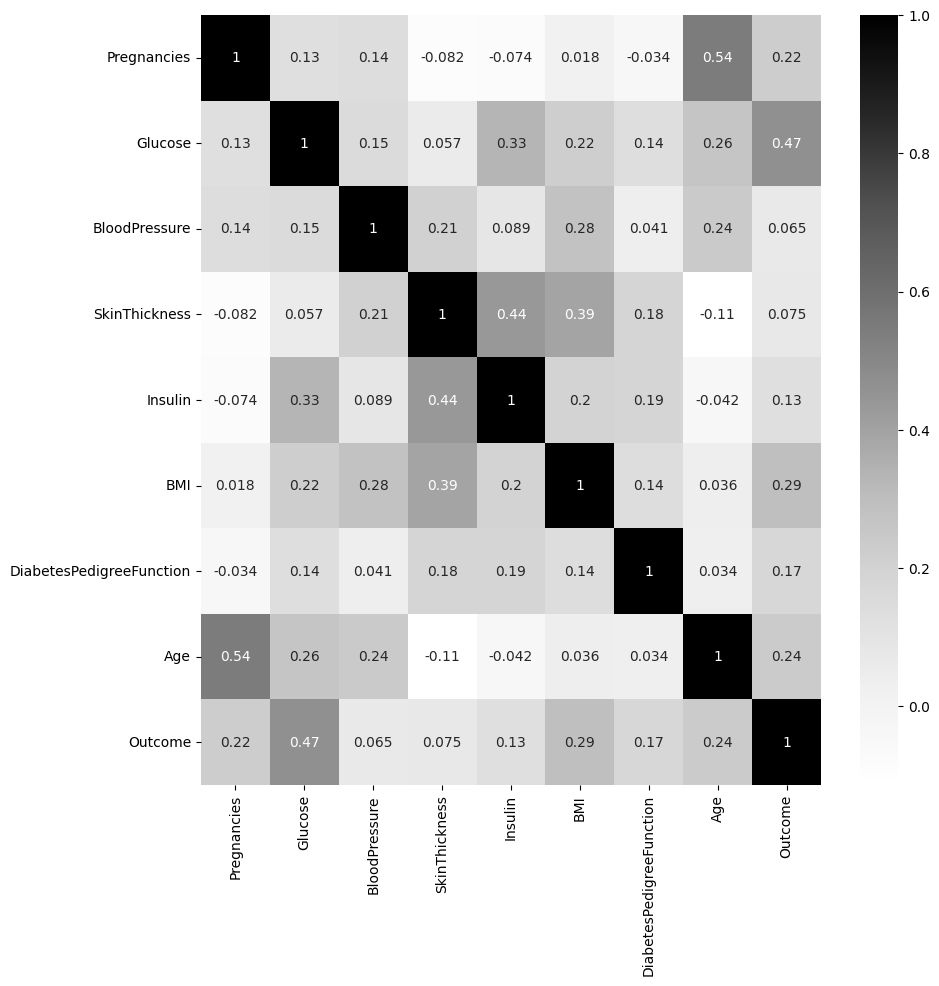

In [6]:

data_frame = pd.read_csv('diabetes.csv') # membaca dataset CSV dari file lokal

features = list(data_frame.columns) # daftar fitur/kolom dataset
NUM_OF_FEATURE = len(features) # konstanta jumlah fitur/kolom dataset

plt.figure(figsize=(10, 10)) # mengatur ukuran figure untuk plot

sns.heatmap(data_frame.corr(), annot=True, cmap=plt.cm.Greys) 
# membuat heatmap untuk menunjukkan relasi antara fitur dalam dataset

plt.show() # menampilkan plot heatmap


In [7]:
columnScore = {} # inisialisasi dictionary untuk menyimpan skor tiap kolom

for i in range(0, NUM_OF_FEATURE - 1): # loop melalui semua kolom kecuali kolom terakhir
    columnScore[features[i]] = len(data_frame[data_frame[features[i]] == 0].index) / data_frame[features[i]].shape[0]
    # menghitung rasio nilai 0 dalam kolom saat ini dan menyimpannya dalam dictionary columnScore

columnScore # menampilkan dictionary columnScore


{'Pregnancies': 0.14453125,
 'Glucose': 0.006510416666666667,
 'BloodPressure': 0.045572916666666664,
 'SkinThickness': 0.2955729166666667,
 'Insulin': 0.4869791666666667,
 'BMI': 0.014322916666666666,
 'DiabetesPedigreeFunction': 0.0,
 'Age': 0.0}

In [8]:
target_dep = {} # inisialisasi dictionary untuk menyimpan korelasi target dengan tiap fitur

for i in range(0, NUM_OF_FEATURE - 1): # loop melalui semua fitur/kolom kecuali kolom terakhir
    target_dep[features[i]] = data_frame[features[NUM_OF_FEATURE - 1]].corr(data_frame[features[i]])
    # menghitung korelasi antara kolom target dan kolom saat ini, lalu menyimpannya dalam dictionary target_dep

avg_target_dep = sum(target_dep.values()) / len(target_dep) # menghitung rata-rata korelasi target dengan fitur


In [9]:
# menghapus fitur dengan persentase nilai nol > 20%
for i in range(0, NUM_OF_FEATURE - 1): # loop melalui semua kolom kecuali kolom terakhir
    if(columnScore[features[i]] > 0.2 and target_dep[features[i]]):
        data_frame.drop(features[i], inplace=True, axis=1)
        # menghapus kolom dari data_frame jika persentase nilai nol > 20% dan ada korelasi dengan target


In [10]:
# New Features
features = list(data_frame.columns) # mendapatkan daftar fitur yang baru setelah penghapusan kolom
NUM_OF_FEATURE = len(features) # menghitung jumlah fitur yang baru
features # menampilkan daftar fitur yang baru


['Pregnancies',
 'Glucose',
 'BloodPressure',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [11]:
listIndex = [] # inisialisasi list untuk menyimpan indeks baris dengan nilai nol pada setiap kolom

for i in range(0, NUM_OF_FEATURE - 1): # loop melalui semua kolom kecuali kolom terakhir
    listIndex.append(list(data_frame[data_frame[features[i]] == 0].index))
    # menyimpan indeks baris dengan nilai nol pada kolom saat ini dalam listIndex

rowsHaveMissingValues = set(listIndex[0]) # mendapatkan set dari indeks baris yang memiliki nilai nol pada kolom pertama
data_frame = data_frame.drop(rowsHaveMissingValues) # menghapus baris dengan indeks yang memiliki nilai nol


In [12]:
data_frame_norm = (data_frame - data_frame.min()) / (data_frame.max() - data_frame.min())
# normalisasi data_frame menggunakan rumus min-max 


In [13]:
# Dataframe (raw)

# Mengambil subset dari true_data_frame yang memiliki Outcome=1 
true_train_data = true_data_frame.sample(frac=0.8, random_state=25)
# Mengambil subset dari true_data_frame yang tidak termasuk dalam data sebagai data uji
true_test_data = true_data_frame.drop(true_train_data.index)

# Mengambil subset dari false_data_frame yang memiliki Outcome=0 sebagai data 
false_train_data = false_data_frame.sample(frac=0.8, random_state=25)
# Mengambil subset dari false_data_frame yang tidak termasuk dalam data sebagai data uji
false_test_data = false_data_frame.drop(false_train_data.index)

# Menggabungkan data dari kelas positif dan kelas negatif
train_data = pd.concat([true_train_data, false_train_data])
# Menggabungkan data dari kelas positif dan kelas negatif
test_data = pd.concat([true_test_data, false_test_data])


# Dataframe (normalisasi)

# Mengambil subset dari true_data_frame_norm yang memiliki Outcome=1 sebagai data 
true_train_data_norm = true_data_frame_norm.sample(frac=0.8, random_state=25)
# Mengambil subset dari true_data_frame_norm yang tidak termasuk dalam data sebagai data uji
true_test_data_norm = true_data_frame_norm.drop(true_train_data_norm.index)

# Mengambil subset dari false_data_frame_norm yang memiliki Outcome=0 sebagai data 
false_train_data_norm = false_data_frame_norm.sample(frac=0.8, random_state=25)
# Mengambil subset dari false_data_frame_norm yang tidak termasuk dalam data  sebagai data uji
false_test_data_norm = false_data_frame_norm.drop(false_train_data_norm.index)

# Menggabungkan data dari kelas positif dan kelas negatif (normalisasi)
train_data_norm = pd.concat([true_train_data_norm, false_train_data_norm])
# Menggabungkan data dari kelas positif dan kelas negatif (normalisasi)
test_data_norm = pd.concat([true_test_data_norm, false_test_data_norm])


In [14]:
# Membuat array fitur (X) dan target (y) dari data (tanpa normalisasi)
X_train = train_data.to_numpy()[:, 0:(NUM_OF_FEATURE - 1)] # fitur dari data train
y_train = train_data.to_numpy()[:, NUM_OF_FEATURE - 1] # target dari data train
X_test = test_data.to_numpy()[:, 0:(NUM_OF_FEATURE - 1)] # fitur dari data test
y_test = test_data.to_numpy()[:, NUM_OF_FEATURE - 1] # target dari data test

# Membuat array fitur (X) dan target (y) dari data (dengan normalisasi)
X_train_norm = train_data_norm.to_numpy()[:, 0:(NUM_OF_FEATURE - 1)] # fitur dari data train (normalisasi)
y_train_norm = train_data_norm.to_numpy()[:, NUM_OF_FEATURE - 1] # target dari data train (normalisasi)
X_test_norm = test_data_norm.to_numpy()[:, 0:(NUM_OF_FEATURE - 1)] # fitur dari data test (normalisasi)
y_test_norm = test_data_norm.to_numpy()[:, NUM_OF_FEATURE - 1] # target dari data test (normalisasi)


In [15]:
model = Sequential() # inisialisasi model sequential

# Menambahkan layer Dense dengan jumlah neuron (NUM_OF_FEATURE - 1) * 10 dan menggunakan fungsi aktivasi ReLU
model.add(Dense((NUM_OF_FEATURE - 1) * 10, input_dim=(NUM_OF_FEATURE - 1), activation='relu'))

# Menambahkan layer Dense dengan jumlah neuron (NUM_OF_FEATURE - 1) * 5 dan menggunakan fungsi aktivasi ReLU
model.add(Dense((NUM_OF_FEATURE - 1) * 5, activation='relu'))

# Menambahkan layer Dense dengan satu neuron dan menggunakan fungsi aktivasi sigmoid
model.add(Dense(1, activation='sigmoid'))

# Mengompilasi model dengan menggunakan binary_crossentropy sebagai loss function, adam sebagai optimizer, dan mengukur akurasi
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# model dengan data train (X_train dan y_train) selama 400 epochs, dengan batch size 10
# dan menggunakan data test yang sudah dinormalisasi (X_test_norm dan y_test_norm) untuk validasi.
history = model.fit(X_train, y_train, epochs=400, batch_size=10, verbose=0, validation_data=(X_test_norm, y_test_norm))


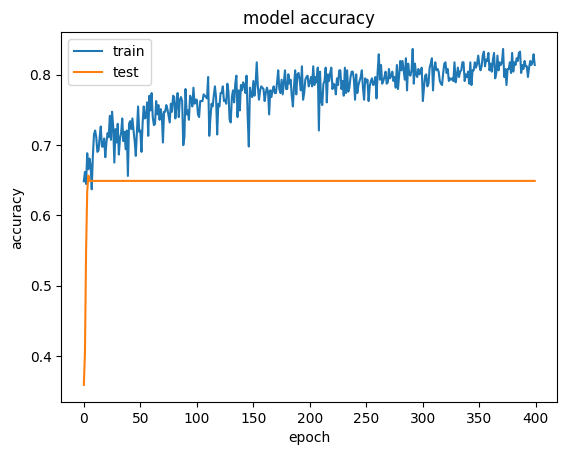

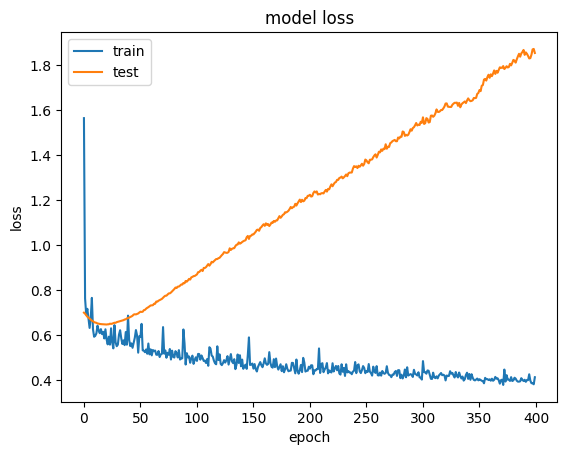

In [17]:
# Menampilkan grafik untuk akurasi model pada data train dan data test
plt.plot(history.history['accuracy']) # plot akurasi data train
plt.plot(history.history['val_accuracy']) # plot akurasi data test
plt.title('Model Accuracy') # judul grafik
plt.ylabel('Accuracy') # label sumbu y
plt.xlabel('Epoch') # label sumbu x
plt.legend(['Train', 'Test'], loc='upper left') # legenda
plt.show() # menampilkan grafik

# Menampilkan grafik untuk loss model pada data train dan data test
plt.plot(history.history['loss']) # plot loss data train
plt.plot(history.history['val_loss']) # plot loss data test
plt.title('Model Loss') # judul grafik
plt.ylabel('Loss') # label sumbu y
plt.xlabel('Epoch') # label sumbu x
plt.legend(['Train', 'Test'], loc='upper left') # legenda
plt.show() # menampilkan grafik


In [18]:
# Memprediksi target menggunakan model pada data test (tanpa normalisasi)
y_pred = model.predict(X_test) # prediksi menggunakan model
y_pred = np.around(y_pred) # membulatkan prediksi ke nilai 0 atau 1

# Memprediksi target menggunakan model pada data test yang sudah dinormalisasi
y_pred_norm = model.predict(X_test_norm) # prediksi menggunakan model yang sudah dinormalisasi
y_pred_norm = np.around(y_pred_norm) # membulatkan prediksi ke nilai 0 atau 1


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


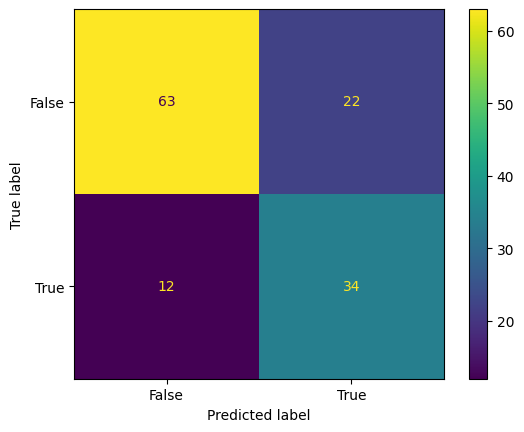

              precision    recall  f1-score   support

         0.0       0.84      0.74      0.79        85
         1.0       0.61      0.74      0.67        46

    accuracy                           0.74       131
   macro avg       0.72      0.74      0.73       131
weighted avg       0.76      0.74      0.75       131



In [19]:
# Menghitung confusion matrix menggunakan prediksi model pada data test yang tidak dinormalisasi
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

# Membuat tampilan confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])

# Menampilkan confusion matrix dalam bentuk plot
cm_display.plot()

# Menampilkan plot
plt.show()

# Menampilkan classification report 
print(classification_report(y_test, y_pred))
